# DATA

The dataset was taken from [Kaggle](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=train.csv) which predicts whether or not the policy holder will claim insurance in the next 6 months.

# IMPORTING

For importing the data, we use pandas. Since the dataset is in csv format, we can use pandas read_csv function to read the dataset and to create a pandas dataframe with it.

In [ ]:
# import all relevant libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# creating a variable to hold the file path as a python string
file_path = '/content/train.csv'

# PREPARATION

In this section, we will create a dataframe from the csv file and do some basic manipulation and cleaning of the dataset

Create pandas dataframe

In [ ]:
# create a dataframe from the csv file using the pandas read_csv function.
dataset = pd.read_csv(file_path)
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


We can derive some meaningful insights about the dataset using the below functions

In [ ]:
# print the first 3 rows of the dataset
dataset.head(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0


In [ ]:
# print the last 3 rows of the dataset
dataset.tail(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,0.124429,0.02,0.442308,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [ ]:
dataset.shape

(58592, 44)

In [ ]:
# Print a concise summary of a DataFrame.
# info function prints information about a DataFrame including
# the index datatype and columns, non-null values and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
# Generate a descriptive statistics.
# Descriptive statistics include those that summarize the central
# tendency, dispersion and shape of the
# dataset's distribution, excluding null values.
dataset.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [ ]:
# gets the sum rows of missing values for each column
dataset.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [ ]:
dataset.shape

(58592, 44)

In [ ]:
# checks for any duplicate rows in the dataset and return the sum of it
dataset.duplicated().sum()

0

Drop duplicates

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
# dropping the policy_id column because that is of no use in the visualisation or prediction
dataset.drop('policy_id', axis=1, inplace=True)

Grouping and indexing. Also, using list here

In [ ]:
categorical_features = []
for column in dataset.columns:
  if dataset[column].dtype == 'object':
    categorical_features.append(column)

Conditional statements and looping. Also grouping by the data type

In [ ]:
numerical_features = []
for column in dataset.columns:
  if dataset[column].dtype == 'int64' or dataset[column].dtype == 'float64':
    numerical_features.append(column)

In [ ]:
print(categorical_features)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


Sorting

In [ ]:
categorical_features = sorted(categorical_features)

In [ ]:
print(categorical_features)

['area_cluster', 'engine_type', 'fuel_type', 'is_adjustable_steering', 'is_brake_assist', 'is_central_locking', 'is_day_night_rear_view_mirror', 'is_driver_seat_height_adjustable', 'is_ecw', 'is_esc', 'is_front_fog_lights', 'is_parking_camera', 'is_parking_sensors', 'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger', 'is_rear_window_washer', 'is_rear_window_wiper', 'is_speed_alert', 'is_tpms', 'max_power', 'max_torque', 'model', 'rear_brakes_type', 'segment', 'steering_type', 'transmission_type']


In [ ]:
print(numerical_features)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(58592, 43)

In [ ]:
dataset.isna().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [ ]:
for feature in categorical_features:
  print(feature)
  print(dataset[feature].unique())
  print(dataset[feature].nunique())
  print("\n")

area_cluster
['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
22


engine_type
['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
11


fuel_type
['CNG' 'Petrol' 'Diesel']
3


is_adjustable_steering
['No' 'Yes']
2


is_brake_assist
['No' 'Yes']
2


is_central_locking
['No' 'Yes']
2


is_day_night_rear_view_mirror
['No' 'Yes']
2


is_driver_seat_height_adjustable
['No' 'Yes']
2


is_ecw
['No' 'Yes']
2


is_esc
['No' 'Yes']
2


is_front_fog_lights
['No' 'Yes']
2


is_parking_camera
['No' 'Yes']
2


is_parking_sensors
['Yes' 'No']
2


is_power_door_locks
['No' 'Yes']
2


is_power_steering
['Yes' 'No']
2


is_rear_window_defogger
['No' 'Yes']
2


is_rear_window_washer
['No' 'Yes']
2


is_rear_window_wiper
['No' 'Yes']
2


is_speed_alert
['Yes' 'No']
2


is_tpms
['No' 'Yes']


Define a custom function to create reusable code. Also, using dict here

In [ ]:
def value_mapper(unique_values):
  i = 0
  m = {}
  for val in unique_values:
    m[val] = i
    i += 1
  return m

In [ ]:
# Mapping categorical features to numerical values
for feature in categorical_features:
  unique_values = dataset[feature].unique()
  m = value_mapper(unique_values)
  dataset[feature] = dataset[feature].map(m)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  int64  
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  int64  
 7   model                             58592 non-null  int64  
 8   fuel_type                         58592 non-null  int64  
 9   max_torque                        58592 non-null  int64  
 10  max_power                         58592 non-null  int64  
 11  engine_type                       58592 non-null  int64  
 12  airb

In [ ]:
dataset.head(5)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.672619,0.02,0.375000,1,27003,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.841110,0.02,0.384615,2,4076,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.900277,0.11,0.432692,3,21622,1,1,1,1,1,...,1,1,1,0,1,1,1,0,2,0
4,0.596403,0.11,0.634615,4,34738,2,0,2,1,2,...,0,1,1,0,0,1,1,0,2,0


In [ ]:
for feature in categorical_features:
  print(feature)
  print(dataset[feature].unique())
  print(dataset[feature].nunique())
  print("\n")

area_cluster
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
22


engine_type
[ 0  1  2  3  4  5  6  7  8  9 10]
11


fuel_type
[0 1 2]
3


is_adjustable_steering
[0 1]
2


is_brake_assist
[0 1]
2


is_central_locking
[0 1]
2


is_day_night_rear_view_mirror
[0 1]
2


is_driver_seat_height_adjustable
[0 1]
2


is_ecw
[0 1]
2


is_esc
[0 1]
2


is_front_fog_lights
[0 1]
2


is_parking_camera
[0 1]
2


is_parking_sensors
[0 1]
2


is_power_door_locks
[0 1]
2


is_power_steering
[0 1]
2


is_rear_window_defogger
[0 1]
2


is_rear_window_washer
[0 1]
2


is_rear_window_wiper
[0 1]
2


is_speed_alert
[0 1]
2


is_tpms
[0 1]
2


max_power
[0 1 2 3 4 5 6 7 8]
9


max_torque
[0 1 2 3 4 5 6 7 8]
9


model
[ 0  1  2  3  4  5  6  7  8  9 10]
11


rear_brakes_type
[0 1]
2


segment
[0 1 2 3 4 5]
6


steering_type
[0 1 2]
3


transmission_type
[0 1]
2




In [ ]:
# Just to demonstrate that we know how to replace the missing values,
# we can simply provide a simple example code here

# dataset.fillna(dataset.mean(numeric_only=True).round(1), inplace=True) # use mean
# dataset.fillna(dataset.median(numeric_only=True).round(1), inplace=True) # use median

In [ ]:
a = dataset.groupby('area_cluster')
a.first()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
area_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.515874,0.05,0.644231,4990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.672619,0.02,0.375000,27003,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.841110,0.02,0.384615,4076,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.900277,0.11,0.432692,21622,1,1,1,1,1,1,...,1,1,1,0,1,1,1,0,2,0
4,0.596403,0.11,0.634615,34738,2,0,2,1,2,2,...,0,1,1,0,0,1,1,0,2,0
5,1.018709,0.07,0.519231,13051,3,2,3,2,3,3,...,1,1,1,0,1,0,1,0,3,0
6,0.097992,0.16,0.403846,6112,4,3,4,2,4,4,...,0,1,1,0,0,0,1,0,5,0
7,0.509085,0.14,0.423077,8794,1,3,5,1,1,1,...,1,1,1,0,1,1,1,0,2,0
8,0.566255,0.04,0.442308,17804,1,3,6,1,1,1,...,1,1,1,0,1,1,1,0,0,0


In [ ]:
dataset.value_counts('is_claim')

is_claim
0    54844
1     3748
dtype: int64

Imbalanced dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


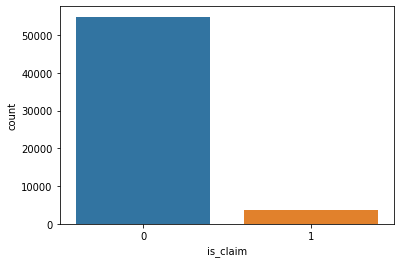

In [ ]:
sns.countplot(dataset['is_claim'])

1. It is clear from the countplot of is_claim column (class labels) the data is imbalanced where over 93% of the dataset is classified as one class (0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

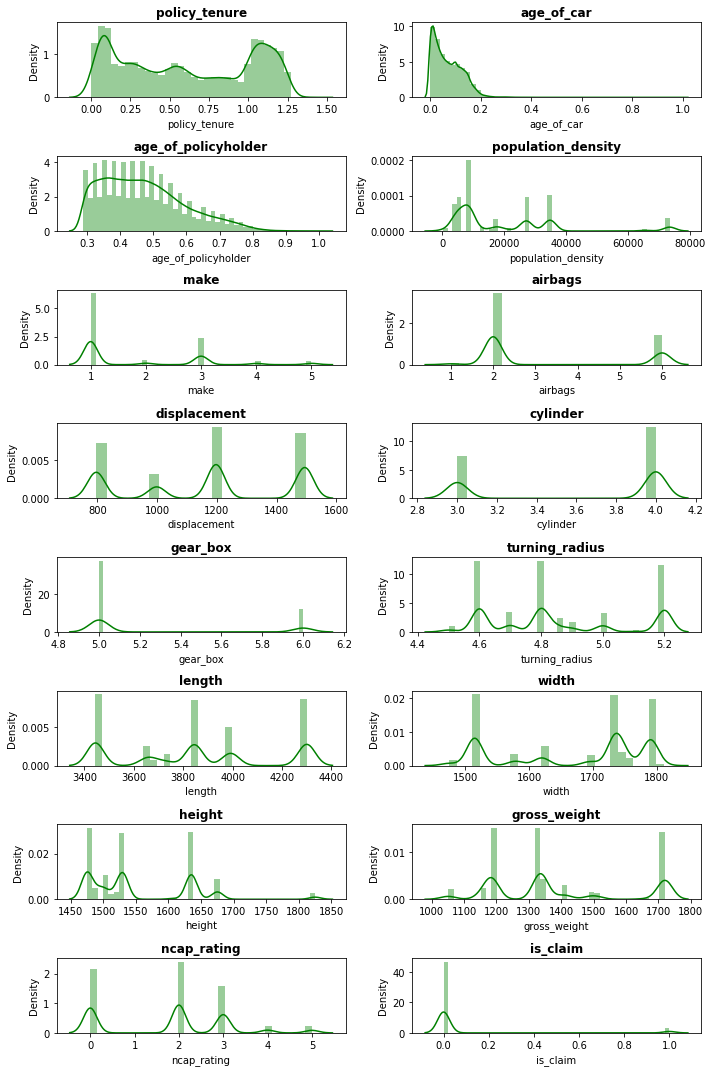

In [ ]:
plt.figure(figsize=(10,15))
for i, column in enumerate(numerical_features):
  plot = plt.subplot(8, 2, i + 1)
  sns.distplot(dataset[column], color='green')
  plt.title(column, weight='bold')
  plt.tight_layout()

2. The density of the normalized age_of_car is high around 0.0 and 0.05 which means the dataset have more data instances of insurance claims for cars of this age

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

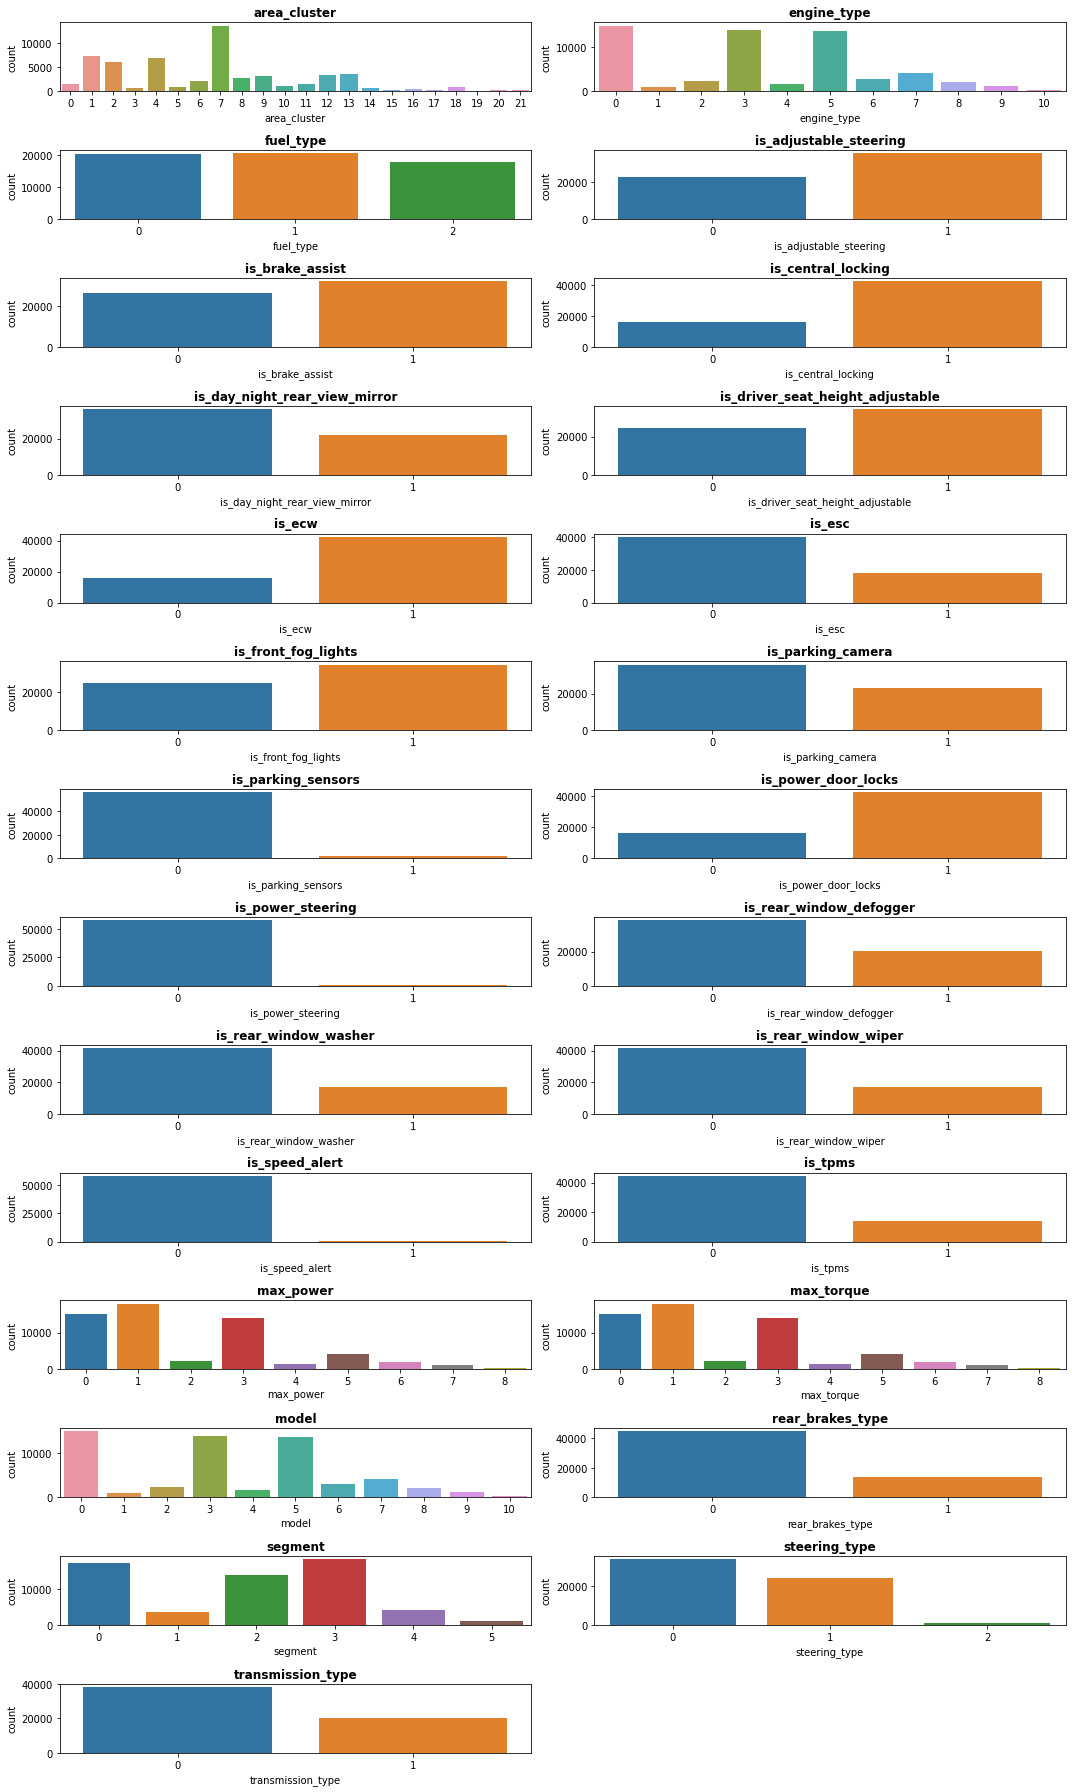

In [ ]:
plt.figure(figsize=(15,25))
for i, column in enumerate(categorical_features):
  plot = plt.subplot(14, 2, i + 1)
  sns.countplot(dataset[column])
  plt.title(column, weight='bold')
  plt.tight_layout()

3. From the above count plot, it is clear that there is a clear imbalance in the dataset for the number of instances for each classes of is_parking_sensors, is_power_steering, and is_speed_alert. Also, class 2 of the steering_type has only a few instances compared to the other classes

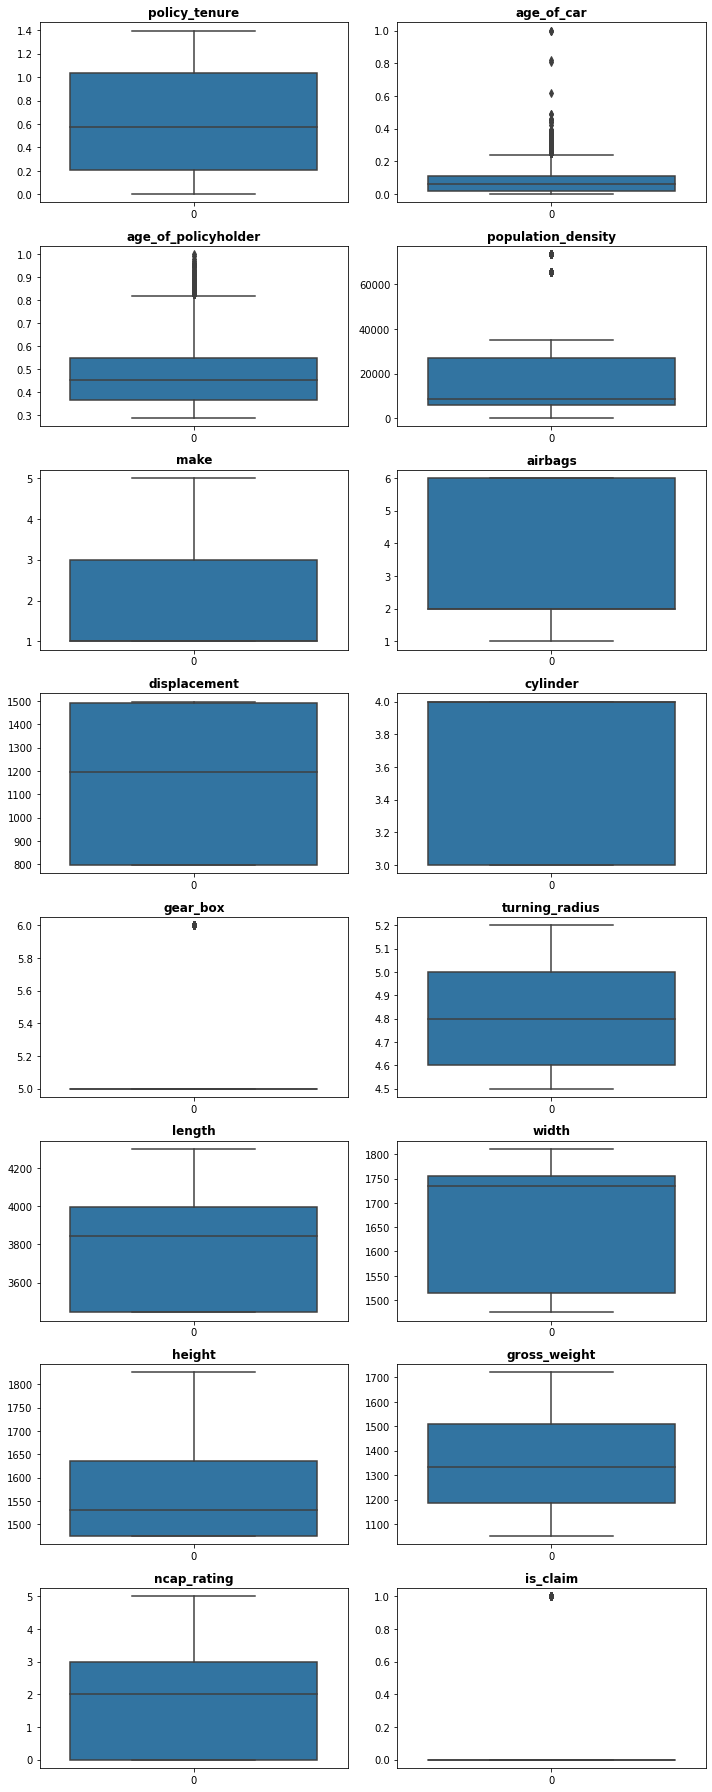

In [ ]:
plt.figure(figsize=(10,25))
for i, column in enumerate(numerical_features):
  plot = plt.subplot(8, 2, i + 1)
  sns.boxplot(data=dataset[column]);
  plt.title(column, weight='bold')
  plt.tight_layout()

4. From the boxplot of the age_of_car, it is clear that the dataset is skewed to one class so that the median also falls below 0.1



In [ ]:
X = dataset.drop('is_claim', axis=1)
Y = dataset['is_claim']